In [47]:
import numpy as np
import pandas as pd
np.random.seed(0)

import matplotlib.pyplot as plt
import gc
import re

from sklearn import datasets
from sklearn.decomposition import PCA, IncrementalPCA, NMF, TruncatedSVD, FastICA, FactorAnalysis, SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from itertools import cycle
from IPython.display import display
import pickle, os

import seaborn as sns

# from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute, MICE
from gaussian_kde import gaussian_kde
from utility import display_components,display_pca_data


import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

%matplotlib inline

In [48]:
from sklearn import datasets, cluster
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import cluster

In [49]:
# you should clone this git to this subdirectory (in some directory - I call it BES_analysis - doesn't matter though)

if os.getcwd().split(os.sep)[-1] != 'BES_analysis_code':
    raise Exception("Stop! You're in the wrong directory - should be in 'BES_analysis_code'")

BES_code_folder   = "../BES_analysis_code/" # we should be here!
BES_small_data_files = BES_code_folder + "small data files" + os.sep
if not os.path.exists( BES_small_data_files ):
    os.makedirs( BES_small_data_files )

# we should create these if they don't already exist
BES_data_folder   = "../BES_analysis_data/"
if not os.path.exists( BES_data_folder ):
    os.makedirs( BES_data_folder )

BES_output_folder = "../BES_analysis_output/"
if not os.path.exists( BES_output_folder ):
    os.makedirs( BES_output_folder )

In [50]:
dataset_name = "W13_comb"

In [51]:
%%time


BES_file_manifest = pd.read_csv( BES_small_data_files + "BES_file_manifest.csv" )
manifest = BES_file_manifest[ BES_file_manifest["Name"] == dataset_name ]

filename = manifest["Stata_Filename"].values[0]

data_subfolder = BES_data_folder + dataset_name + os.sep

Treatment = dataset_name


# dataset = "BES2017_W13_v1.0.dta"
# wave = "W13_only"

BES_Panel = pd.read_stata( data_subfolder + filename)

print( BES_Panel.shape )

# 20 mins for W13_comb

(69486, 5173)
Wall time: 22min 47s


In [44]:
# BES_Panel["euRefVote"]
# BES_Panel["profile_ethnicity"]
# BES_Panel["wt_full_W9"]

In [52]:
# add N=??? sample size to each category type!
cats = BES_Panel[var1].cat.categories
sample_sizes = BES_Panel[var1].value_counts().loc[cats].values
cat_plus_sample_sizes = ["".join([x," (N=", str(y),")"]) for x,y in zip(cats, sample_sizes)]
BES_Panel[var1].cat.rename_categories( cat_plus_sample_sizes, inplace=True )

In [63]:
[x for x in BES_Panel.columns if "euRefVote" in x]

['euRefVoteW1',
 'euRefVoteW2',
 'euRefVoteW3',
 'euRefVoteW4',
 'euRefVoteW6',
 'euRefVoteW7',
 'euRefVoteSqueezeW7',
 'euRefVoteUnsqueezeW7',
 'euRefVotePostW8',
 'euRefVoteW8',
 'euRefVoteSqueezeW8',
 'euRefVoteUnsqueezeW8',
 'euRefVote2W8',
 'euRefVoteHypotheticalW9',
 'euRefVoteW9',
 'euRefVoteW10',
 'euRefVoteW11',
 'euRefVoteW12',
 'euRefVoteW13']

In [ ]:
weights = 'wt_new_W13'

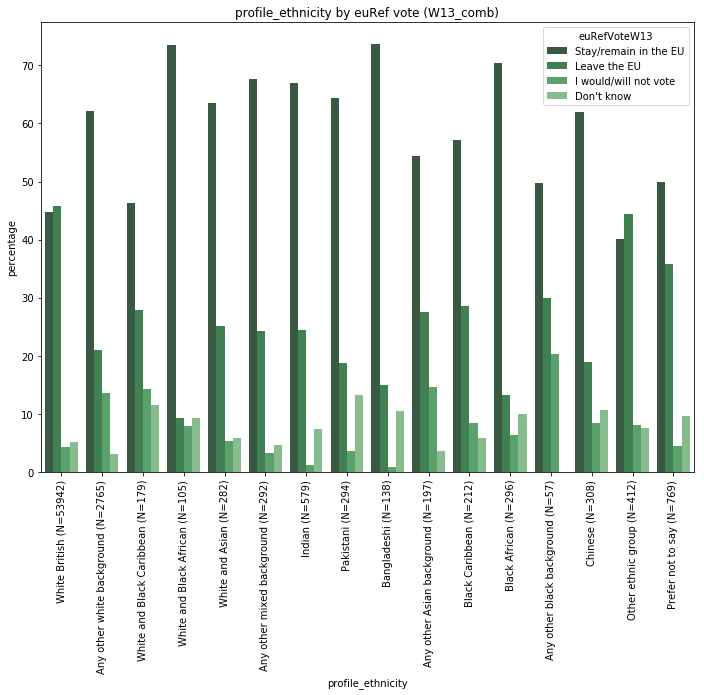

In [61]:
var1 = "profile_ethnicity"
var2 = 'euRefVoteW13'
weights = 'wt_new_W13'

# # add N=??? sample size to each category type!
# sample_sizes = df[col].value_counts().loc[cats].values
# cat_plus_sample_sizes = ["".join([x," (N=", str(y),")"]) for x,y in zip(cats, sample_sizes)]
# df[col].cat.rename_categories( cat_plus_sample_sizes, inplace=True )


ct = pd.crosstab(BES_Panel[var1],BES_Panel[var2],normalize='index',aggfunc = sum, values = BES_Panel[weights])*100
pct = ct.stack().reset_index().rename(columns={0:'percentage'})

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)



sns.barplot(hue=var2, x=var1, y='percentage', data=pct, palette="Greens_d",ax=ax);
ax.set_title("profile_ethnicity by euRef vote "+"("+dataset_name+")")


ax.set_xticklabels( BES_Panel[var1].cat.categories , rotation=90 ) ;

fig.savefig( BES_data_folder+Treatment+"profile_ethnicity_by_euRefvote"+"("+dataset_name+")"+".png", bbox_inches='tight' )


In [39]:
Treatment

'W9_only'

In [62]:
BES_Panel[].value_counts()

Stay/remain in the EU    15218
Leave the EU             13624
Don't know                1444
I would/will not vote      911
Name: euRefVoteW13, dtype: int64

euRefVoteW1                30325
euRefVoteW2                25798
euRefVoteW3                27830
euRefVoteW4                31439
euRefVoteW6                30148
euRefVoteW7                30895
euRefVoteSqueezeW7          4717
euRefVoteUnsqueezeW7       30895
euRefVotePostW8             4326
euRefVoteW8                33501
euRefVoteSqueezeW8          3818
euRefVoteUnsqueezeW8       29175
euRefVote2W8               29175
euRefVoteHypotheticalW9     1788
euRefVoteW9                28248
euRefVoteW10               30319
euRefVoteW11               31014
euRefVoteW12               34464
euRefVoteW13               31197
dtype: int64